# `Практикум по программированию на языке Python`
<br>

## `Занятие 03: Основы Pytorch`
<br><br>

### `Находнов Максим (nakhodnov17@gmail.com)`

#### `Москва, 2024`

О чём можно узнать из этого ноутбука:

* Базовый синтаксис и понятия библиотеки Pytorch

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

import torch
import numpy as np

## `Почему torch?`

Ключевые отличия от `numpy/sklearn`:
1. Поддерживает вычисления на **CPU/GPU/TPU**
2. **Автоматическое дифференцирование**

Основные методы обучения нейронных сетей являются методами оптимизации первого порядка. Они присутствуют, например, в пакете `scipy.optimize`, но либо считают градиенты численно, либо требуют внешних функций, предоставляющих им градиенты в требуемой точке. Написание таких функций вручную для каждой нейронной сети — задача решаемая, но достаточно бессмысленная, т.к. производные, даже аналитически, достаточно легко может считать и машина.

Концепция библиотеки `pytorch` — расширить функционал `numpy`, добавив туда возможность автоматического расчёта градиентов произвольных функций и их композиций, стараясь максимально сохранить привычную семантику.

Особенности:
1. Синтаксиччески повторяет `numpy`/`scipy`
2. Большой набор готовых компонент для реализации и обучения DL моделей
3. Для решения домен-спецефичных задач есть свои библиотеки
    * **`torchvision`**
    * `torchaudio`
    * `torchtext`
    * `TorchData`
    * `TorchRec`
    * `TorchServe`
4. В конкурентной борьбе победил конкурентов в исследованиях и образовании
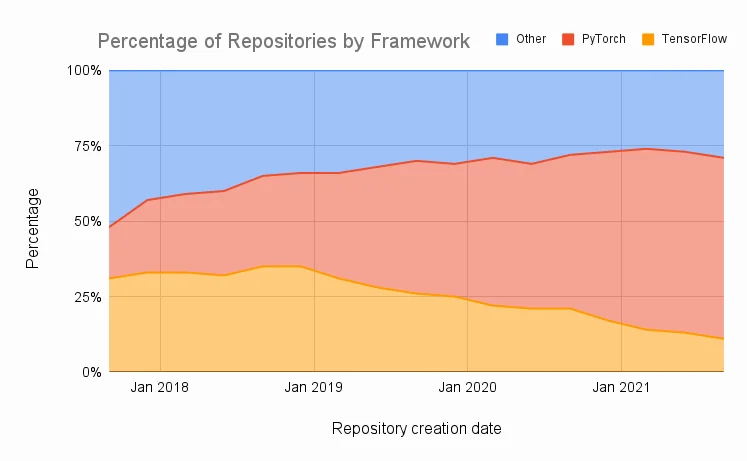

## `Общий обзор`

База:
* [torch.Tensor](https://pytorch.org/docs/stable/tensors.html)
* [Tensor Views](https://pytorch.org/docs/stable/tensor_view.html)                  
* [Tensor Attributes](https://pytorch.org/docs/stable/tensor_attributes.html)            
* [torch](https://pytorch.org/docs/stable/torch.html) — основные операции над тензорами
    * Tensors
        * Creation Ops
        * Indexing, Slicing, Joining, Mutating Ops
    * Generators
    * Random sampling
        * In-place random sampling
        * Quasi-random sampling
    * Serialization
    * Parallelism
    * Locally disabling gradient computation
    * Math operations
        * Pointwise Ops
        * Reduction Ops
        * Comparison Ops
        * Spectral Ops
        * Other Operations
        * BLAS and LAPACK Operations
    * Utilities
    * Operator Tags


* [torch.nn](https://pytorch.org/docs/stable/nn.html) — блоки-классы для DL моделей
    * Containers
    * Convolution Layers
    * Pooling layers
    * Padding Layers
    * Non-linear Activations (weighted sum, nonlinearity)
    * Non-linear Activations (other)
    * Normalization Layers
    * Recurrent Layers
    * Transformer Layers
    * Linear Layers
    * Dropout Layers
    * Sparse Layers
    * Distance Functions
    * Loss Functions
    * Vision Layers
    * Shuffle Layers
    * DataParallel Layers (multi-GPU, distributed)
    * Utilities
    * Quantized Functions
    * Lazy Modules Initialization
* [torch.nn.functional](https://pytorch.org/docs/stable/nn.functional.html) — блоки-функции для DL моделей в 
* [torch.linalg](https://pytorch.org/docs/stable/linalg.html) — аналог `numpy.linalg`
* [torch.special](https://pytorch.org/docs/stable/special.html) — аналог `scipy.special` 
* [torch.nn.init](https://pytorch.org/docs/stable/nn.init.html) — методы для инициализации весов      
* [torch.optim](https://pytorch.org/docs/stable/optim.html) — классы-оптимизаторы
* [torch.random](https://pytorch.org/docs/stable/random.html) — случайное семплирование     
* [torch.autograd](https://pytorch.org/docs/stable/autograd.html) — продвинутое дифференцирование
* [torch.hub](https://pytorch.org/docs/stable/hub.html) — предобученные модели
* [torch.fft](https://pytorch.org/docs/stable/fft.html) — аналог `scipy.fft` 
* [torch.utils.tensorboard](https://pytorch.org/docs/stable/tensorboard.html) — логгирование в tensorboard            


Популярные модули:
* [torch.amp](https://pytorch.org/docs/stable/amp.html) — mixed precision training                
* [Complex Numbers](https://pytorch.org/docs/stable/complex_numbers.html) — комплексные числа
* [Quantization](https://pytorch.org/docs/stable/quantization.html) — квантизация
* [torch.distributions](https://pytorch.org/docs/stable/distributions.html) — классы для распределений с поддержкой дифференцирования (Reparameterization Trick/REINFORCE)


Вспомодательные модули:
* [torch.cuda](https://pytorch.org/docs/stable/cuda.html) — параметры и свойства вычисления на GPU
* [torch.backends](https://pytorch.org/docs/stable/backends.html) — параметры устройства для вычисления 
* [torch.__config__](https://pytorch.org/docs/stable/config_mod.html) — текущая конфигурация


Распределённые вычисления:
* [torch.distributed](https://pytorch.org/docs/stable/distributed.html)                  
* [torch.distributed.algorithms.join](https://pytorch.org/docs/stable/distributed.algorithms.join.html)  
* [torch.distributed.elastic](https://pytorch.org/docs/stable/distributed.elastic.html)        
* [torch.distributed.fsdp](https://pytorch.org/docs/stable/fsdp.html)                         
* [torch.distributed.optim](https://pytorch.org/docs/stable/distributed.optim.html )           
* [DDP Communication Hooks](https://pytorch.org/docs/stable/ddp_comm_hooks.html)               
* [Pipeline Parallelism](https://pytorch.org/docs/stable/pipeline.html)  
* [Distributed RPC Framework](https://pytorch.org/docs/stable/rpc.html)                          


Для разработки расширений:
* [torch.library](https://pytorch.org/docs/stable/library.html)                      
* [torch.utils.cpp_extension](https://pytorch.org/docs/stable/cpp_extension.html)                


Разное:
* [torch.jit](https://pytorch.org/docs/stable/jit.html)                          
* [torch.futures](https://pytorch.org/docs/stable/futures.html)                      
* [torch.fx](https://pytorch.org/docs/stable/fx.html)                           
* [torch.monitor](https://pytorch.org/docs/stable/monitor.html)                      
* [torch.overrides](https://pytorch.org/docs/stable/torch.overrides.html)          
* [torch.package](https://pytorch.org/docs/stable/package.html)                      
* [torch.profiler](https://pytorch.org/docs/stable/profiler.html)                     
* [torch.onnx](https://pytorch.org/docs/stable/onnx.html)                                 
* [torch.masked](https://pytorch.org/docs/stable/masked.html)                       
* [torch.nested](https://pytorch.org/docs/stable/nested.html)                       
* [torch.sparse](https://pytorch.org/docs/stable/sparse.html)                       
* [torch.Storage](https://pytorch.org/docs/stable/storage.html)                      
* [torch.testing](https://pytorch.org/docs/stable/testing.html)                      
* [torch.utils.benchmark](https://pytorch.org/docs/stable/benchmark_utils.html)              
* [torch.utils.bottleneck](https://pytorch.org/docs/stable/bottleneck.html)                   
* [torch.utils.checkpoint](https://pytorch.org/docs/stable/checkpoint.html)                   
* [torch.utils.jit](https://pytorch.org/docs/stable/jit_utils.html)                    
* [torch.utils.dlpack](https://pytorch.org/docs/stable/dlpack.html)                       
* [torch.utils.mobile_optimizer](https://pytorch.org/docs/stable/mobile_optimizer.html)             
* [torch.utils.model_zoo](https://pytorch.org/docs/stable/model_zoo.html)                    
* [Type Info](https://pytorch.org/docs/stable/type_info.html)                    
* [Named Tensors](https://pytorch.org/docs/stable/named_tensor.html)                 
* [Named Tensors operator coverage](https://pytorch.org/docs/stable/name_inference.html)               

## `Базовые операции над тензорами`

Основной объект в pytorch — тензор (`torch.Tensor`), который является близким аналогом массива из numpy (`np.ndarray`).

In [2]:
(
    torch.zeros([5, 7]), 
    torch.ones([5, 7], dtype=torch.int32), 
    torch.randn([5, 7])
)

(tensor([[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]]),
 tensor([[1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32),
 tensor([[ 0.6421, -0.7510,  0.2902, -1.1373, -0.3381, -0.2419,  2.1136],
         [-0.1471, -0.9218, -0.7532, -1.4782,  0.2996,  0.1003,  1.6461],
         [ 1.2146, -0.2992,  0.3497,  0.5643,  0.9128, -0.3024,  0.5329],
         [ 0.4227, -0.4736,  2.5723, -0.5186,  1.4417, -1.1723, -0.9542],
         [ 0.5630, -1.0024, -0.9261, -0.8134,  0.2057,  0.1802, -2.2309]]))

Набор операций тоже очень схож:

In [3]:
A, B = torch.randn(3, 5), torch.randn(5, 3)
A, A + B.T, A @ B, torch.sum(A), B.prod()

(tensor([[-0.9861, -1.1153, -0.1128, -0.9361, -1.9882],
         [-2.2350, -0.1438, -0.0523, -1.2782,  1.2346],
         [ 0.3968, -0.9047,  1.2549,  0.5906,  0.7667]]),
 tensor([[-0.4045, -1.6527,  0.4999, -1.5573, -3.4186],
         [-4.0367, -0.7244, -0.1112, -1.1940,  0.1017],
         [ 0.7854,  0.2155, -0.7974,  1.2074,  0.1830]]),
 tensor([[ 3.3820,  4.6045, -0.8179],
         [-2.2267,  2.6070, -2.4310],
         [ 0.0223, -1.0824, -3.5179]]),
 tensor(-5.5089),
 tensor(-0.0003))

Преобразование из torch в numpy:

In [4]:
w = torch.tensor([1, 2, 3.0])
w_np = w.numpy()
type(w_np), w_np, type(w), w

(numpy.ndarray,
 array([1., 2., 3.], dtype=float32),
 torch.Tensor,
 tensor([1., 2., 3.]))

Преобразование из numpy в torch через копирование данных:

In [5]:
v_np = np.arange(10)
v = torch.tensor(v_np)

v_np += 1

type(v_np), v_np, type(v), v

(numpy.ndarray,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 torch.Tensor,
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

Преобразование из numpy в torch с общим буфером:

In [6]:
u_np = np.full([2, 3], -1.0)
u = torch.from_numpy(u_np)

u_np += 10.0

type(u_np), u_np, type(u), u

(numpy.ndarray,
 array([[9., 9., 9.],
        [9., 9., 9.]]),
 torch.Tensor,
 tensor([[9., 9., 9.],
         [9., 9., 9.]], dtype=torch.float64))

Однако есть небольшие различия:
* `axis` -> `dim`: `np.sum(A, axis=0) -> torch.sum(A, dim=0)`
* `.reshape` -> `.view/.reshape`
* `.astype` -> `.to/.type`

Так же, есть возможность использовать inplace операции:

In [7]:
A[1] += A[2]
A

tensor([[-0.9861, -1.1153, -0.1128, -0.9361, -1.9882],
        [-1.8382, -1.0485,  1.2025, -0.6876,  2.0014],
        [ 0.3968, -0.9047,  1.2549,  0.5906,  0.7667]])

In [8]:
A.zero_()
A

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [9]:
torch.exp(A)
A.exp_()

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

Полезные функции

* Сконкатенировать набор тензоров вдоль заданной размерности `torch.cat`
* Соединить тензоры одинаковой формы вдоль новой размерности `torch.stack`
* Добавить/убрать новую "единичную" размерность в тензор `torch.unsqueeze/torch.squeeze`
* Разбить тензор на заданное число блоков `torch.chunk`
* Переставить между собой две размерности `torch.transpose`
* Переставить местами все размерности `torch.permute`
* Повторить тензор `torch.tile/torch.repeat`
* Найти максимальный элемент (возвращает И положение, И значение) `torch.max`
* Поэлементный максимум между двумя `тензорамиtorch.maximum`
* "Выпрямить" тензор, объединив все размерности в одну `torch.ravel`
* Объединить только заданные размерности `torch.flatten`
* Вернуть k наибольших элементов `torch.topk`

#### `Первое ключевое отличие — возможность перемещения на GPU`

In [10]:
a = torch.randn(3, 5)
a.dtype, a.device

(torch.float32, device(type='cpu'))

Проверим, что GPU доступна:

In [11]:
torch.cuda.is_available()

False

In [12]:
device = (
    torch.device('cuda', 0) # эквивалентно: torch.device('cuda:0') / 'cuda' / 'cuda:0'
    if torch.cuda.is_available() 
    else torch.device('cpu') 
)
device

device(type='cpu')

In [13]:
a.to(device)

tensor([[ 0.1152,  0.1546, -0.9449, -1.6251, -0.8447],
        [-0.5225, -1.1298, -1.2684,  1.1318,  0.0315],
        [ 0.2922, -1.4419,  0.7172,  1.2302, -0.3422]])

Операции между тензорами на разных устройствах не возможны:

In [ ]:
a.cuda() + a

Обратите внимание, что при изменении device (c GPU на CPU и обратно происходит копирование):

In [ ]:
p_cpu = torch.rand(10)
p_gpu = p_cpu.to(device)

p_cpu -= 1
p_cpu, p_gpu

#### `Второе ключевое отличие — Autograd`

Все тензоры содержат атрибут `.grad`, который может хранить градиент по этому тензору.

In [14]:
a.grad

По умолчанию, тензоры, создаваемые в pytorch, не будут требовать, чтобы для них посчитали градиент. Для этого надо добавить дополнительный аргумент `requires_grad=True`, либо вызвав метод `.requires_grad_()`.

In [15]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([1., 2., 3.])
y.requires_grad_()

tensor([1., 2., 3.], requires_grad=True)

Производя операции с переменными, по которым нужно считать градиенты, мы конструируем граф вычислений:

In [16]:
z = 3 * x**3 - y**2
z.requires_grad

True

В каждой переменной есть информация о том, как именно она была получена при проходе вперёд. Исходя из этой информации у тензоров в графе вычислений хранятся функции, которые должны быть вызваны на обратном проходе для расчёта градиента.

In [17]:
z.grad_fn

Считать для каждого тензора якобиан целиком — сильно неоптимально. Вместо этого на всех промежуточных этапах autograd считает только произведения якобиан-вектор. В частности из-за этого, конечный тензор в графе всегда должен быть скаляром, что выполняется для всех функций потерь по определению.

Для примера сделаем из тензора `z` скаляр, сложив все его элементы, и посчитаем градиенты с помощью функции .backward()

In [18]:
z.sum().backward()

In [19]:
x.grad, y.grad

(tensor([ 9., 36., 81.]), tensor([-2., -4., -6.]))

Сравним с посчитанным вручную градиентом:

In [20]:
torch.allclose(x.grad, 9 * x**2)

True

Однако, для оптимизации вычислений, градиенты не вычисляются в явном виде для промежуточных вершин графа

In [21]:
z.grad

/var/folders/3c/vr2463p11lz5fr_80mrg72gh0000gq/T/ipykernel_47876/4110045842.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:485.)
  z.grad


Если такое всё же нужно, требуется указать это явно с помощью вызова `.retain_grad()`

In [22]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([1., 2., 3.])

z = 3 * x**3 - y**2
z.retain_grad()

z.sum().backward()
z.grad

tensor([1., 1., 1.])

#### `Визуализация графа вычислений`

Для примера визуализируем, как бы выглядел граф вычислений для линейной регресси.

Заметим, что пакет визуализации `pytorchviz` предназначен в первую очередь для визуализации нейронных сетей, поэтому нам необходимо будет использовать класс `torch.nn.Parameter`, который является обёрткой над тензором и несколько расширяет возможности аргумента `requires_grad=True`

Графы визуализируются библиотекой `graphviz`. 

In [23]:
! pip3 install torchviz


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [24]:
from torchviz import make_dot

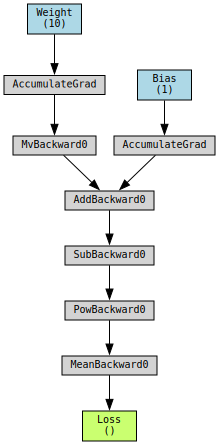

In [25]:
X = torch.rand(5, 10)
y = torch.rand(5)

w = torch.nn.Parameter(torch.rand(10))
b = torch.nn.Parameter(torch.rand(1))

y_hat = X @ w + b

loss = torch.mean((y - y_hat)**2)
make_dot(loss, params={'Weight': w, 'Bias': b, 'Loss': loss})

Что можно сказать об этом графе вычислений?

* В листьях графа мы не видим тензора `X`, так кка нам требуется расчёт градиента только по параметрам модели.
* `MvBackward0` соответствует матрично-векторному умножению (отсюда и первые буквы `Mv`) c матрицей `X`.
* `AddBackward0` соответствует добавлению смещения `b`, остальная часть графа — вычисление MSE.

#### `Аккумулирование градиентов`

Если не предпринимать никаких дополнительных действий, то множественный вызов `.backward()` будет не перезаписывать градиенты тензоров, а складывать их с уже существующим значением (сам граф вычислений каждый раз разрушается). Такое поведение может быть, например, нужно, чтобы посчитать градиент по батчу данных, который не влезает в память компьютера целиком, так как градиент модели аддитивен по входным данным.

In [26]:
x = torch.randn(3, 3, requires_grad=True)
y = torch.sum(x * x)
y.backward()

x.grad

tensor([[ 1.6422, -1.6038,  1.4735],
        [ 0.8832, -1.2830, -0.0582],
        [-2.3583, -0.6569,  1.2666]])

In [27]:
z = torch.sum(2 * x)
z.backward()

# Заметьте, что ко всем значениям прибавилось 2
x.grad

tensor([[ 3.6422,  0.3962,  3.4735],
        [ 2.8832,  0.7170,  1.9418],
        [-0.3583,  1.3431,  3.2666]])

Также подобный подход используется в рекуррентных нейронных сетях, где к одному и тому же тензору весов нейросети происходит несколько обращений во время прямого прохода.

Чтобы считать градиент с нуля, достаточно удалить тензор.

In [28]:
x.grad = None

#### `Inplace операции`

По умолчанию, вызов `y = 2 * x` создаст новый тензор, в который скопирует значения `x`, умноженные на `2`. И есть большое желание провести данную операцию на месте, то есть без аллокации памяти. В nupmy это не имело бы никаких дополнительных последствий, но в pytorch нам надо помнить о графе вычислений, который должен быть без петель, а также может использовать тензоры, рассчитанные при прямом вычислении. В некоторых случаях библиотека может выполнить код и не ругнуться, но описание ситуаций, когда такое сработает, а когда нет, очень сложно, и потому сами разработчики не рекомендуют использовать in-place операции там, где необходим расчёт градиента.

In-place операции всегда имеют символ `_` на конце.

In [29]:
x = torch.randn(3, 3, requires_grad=True)
y = 2 * x
z = y ** 2
# inplace operation!
y.exp_()  
z.sum().backward()

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [3, 3]], which is output 0 of ExpBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

Другой распространённый в numpy сценарий - маскированное изменение значений тензора. Это тоже является in-place операцией. В pytorch для этого лучше использовать функцию `torch.where`:

In [30]:
x = torch.rand(3,3, requires_grad=True)
x

tensor([[0.4336, 0.4062, 0.5464],
        [0.6937, 0.9116, 0.0409],
        [0.7574, 0.9459, 0.3376]], requires_grad=True)

In [31]:
x[x > 0.5] = 0

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [32]:
torch.where(x > 0.5, 0, x)

tensor([[0.4336, 0.4062, 0.0000],
        [0.0000, 0.0000, 0.0409],
        [0.0000, 0.0000, 0.3376]], grad_fn=<WhereBackward0>)

#### `Копирование тензоров`

В numpy существует интуитивно понятная функция `.copy()`, но в pytorch функции с таким названием нет! Это связано с тем, что тензоры в pytorch привязаны к графу вычислений, который надо также учитывать при копировании.

`.clone()` копирует тензор и сохраняет его привязку к текущему дереву вычислений:

In [33]:
x = torch.rand(3, requires_grad=True)
y = x.clone()
y.requires_grad

True

`.detach()` исходя из своего названия, копирует лишь значения элементов тензора, отвязывая его от текущего графа вычислений:

In [34]:
y = x.detach()
y.requires_grad

False

Продемонстрируем на графе вычислений эти две операции:

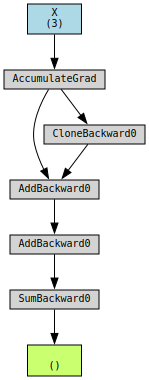

In [35]:
x = torch.nn.Parameter(torch.rand(3))
y = torch.nn.Parameter(torch.rand(3))

z = torch.sum(x + x.clone() + y.detach())

make_dot(z, params={'X': x, 'Y': y})

Что можно понять из данного графа?

* Видна операция `CloneBackward0`, которая клонирует тензор `x`. Благодаря ей в сумме участвует как исходный тензор, так и его экспонированная версия.
* Во второй сумме мы не видим параметра `y`, потому что он входит в граф вычислений только через `.detach()`, что убирает проход градиентов.

#### `Продвинутое дифференцирование`

В модуле `autorgrad` есть набор функций для более сложных операций по подсчёту градиентов: 

In [36]:
X = torch.randn(5, 10)
w = torch.randn(10, requires_grad=True)

Например, подсчёт градиентов скалярной функции:

In [37]:
torch.autograd.grad(torch.mean(X @ w), [w]), X.mean(dim=0)

((tensor([-0.3403,  0.0802,  0.4556,  0.1444, -0.0829, -0.4680, -0.4309, -0.6910,
          -0.0474, -0.1296]),),
 tensor([-0.3403,  0.0802,  0.4556,  0.1444, -0.0829, -0.4680, -0.4309, -0.6910,
         -0.0474, -0.1296]))

Вычисление произведения якобиана на вектор $vJ$, где $J = \nabla_{w} L(w) \in \mathbb{R}^{n \times d}, w \in \mathbb{R}^{d}, L(w)\in \mathbb{R}^{n}$

In [38]:
v = torch.randn(5)
torch.autograd.grad(X @ w, [w], grad_outputs=v), v @ X

((tensor([ 2.8464,  0.2514, -1.2352,  3.5278, -0.8807, -1.1547,  1.6524,  2.5139,
          -0.7124, -0.1250]),),
 tensor([ 2.8464,  0.2514, -1.2352,  3.5278, -0.8807, -1.1547,  1.6524,  2.5139,
         -0.7124, -0.1250]))

Подсчёт градиентов по элементам в батче:

In [39]:
# Экспериментальная фича
torch.autograd.grad(X @ w, [w], grad_outputs=(torch.eye(5), ), is_grads_batched=True), X

((tensor([[-1.2696,  0.8204,  0.4455, -1.5470, -1.1027, -1.9419, -0.4124, -1.1925,
            0.9744,  0.0025],
          [-0.1860,  0.2552,  0.0605,  1.3691, -0.4573, -0.7374, -0.0127, -0.0958,
            0.0967, -0.6392],
          [-0.1859,  0.5224, -0.4162,  1.1868,  0.2611,  0.5703, -0.3630,  0.1817,
           -1.1567,  0.1271],
          [-2.1699, -0.3734,  0.5346, -1.7271,  1.0141,  1.8544, -1.0369, -1.3105,
            0.3716, -0.3080],
          [ 2.1097, -0.8237,  1.6536,  1.4400, -0.1296, -2.0855, -0.3292, -1.0377,
           -0.5233,  0.1694]]),),
 tensor([[-1.2696,  0.8204,  0.4455, -1.5470, -1.1027, -1.9419, -0.4124, -1.1925,
           0.9744,  0.0025],
         [-0.1860,  0.2552,  0.0605,  1.3691, -0.4573, -0.7374, -0.0127, -0.0958,
           0.0967, -0.6392],
         [-0.1859,  0.5224, -0.4162,  1.1868,  0.2611,  0.5703, -0.3630,  0.1817,
          -1.1567,  0.1271],
         [-2.1699, -0.3734,  0.5346, -1.7271,  1.0141,  1.8544, -1.0369, -1.3105,
           0.371

In [40]:
# Медленная альтернатива:

y = X @ w
torch.stack(([torch.autograd.grad(y[idx], w, retain_graph=True)[0] for idx in range(y.shape[0])])), X

(tensor([[-1.2696,  0.8204,  0.4455, -1.5470, -1.1027, -1.9419, -0.4124, -1.1925,
           0.9744,  0.0025],
         [-0.1860,  0.2552,  0.0605,  1.3691, -0.4573, -0.7374, -0.0127, -0.0958,
           0.0967, -0.6392],
         [-0.1859,  0.5224, -0.4162,  1.1868,  0.2611,  0.5703, -0.3630,  0.1817,
          -1.1567,  0.1271],
         [-2.1699, -0.3734,  0.5346, -1.7271,  1.0141,  1.8544, -1.0369, -1.3105,
           0.3716, -0.3080],
         [ 2.1097, -0.8237,  1.6536,  1.4400, -0.1296, -2.0855, -0.3292, -1.0377,
          -0.5233,  0.1694]]),
 tensor([[-1.2696,  0.8204,  0.4455, -1.5470, -1.1027, -1.9419, -0.4124, -1.1925,
           0.9744,  0.0025],
         [-0.1860,  0.2552,  0.0605,  1.3691, -0.4573, -0.7374, -0.0127, -0.0958,
           0.0967, -0.6392],
         [-0.1859,  0.5224, -0.4162,  1.1868,  0.2611,  0.5703, -0.3630,  0.1817,
          -1.1567,  0.1271],
         [-2.1699, -0.3734,  0.5346, -1.7271,  1.0141,  1.8544, -1.0369, -1.3105,
           0.3716, -0.3080],

Обратите внимание, что в предыдущем примере проход через один и тот же граф вычислений делается несколько раз. По умолчанию, после первого прохода граф уничтожается. Чтобы этого избежать используйте `retain_graph=True`

Подсчёт вторых производных:

In [41]:
S = w @ X.T @ X @ w

# Подсчёт в два шага. Для создания графа вычислений вторых производных используется параметр create_graph=True:

[grad] = torch.autograd.grad(S, w, create_graph=True)
print(torch.linalg.norm(grad - 2 * X.T @ X @ w))

[hessian] = torch.autograd.grad(grad, w, grad_outputs=(torch.eye(w.shape[0]), ), is_grads_batched=True)
print(torch.linalg.norm(hessian - 2 * X.T @ X))

# Подсчёт в функциональном виде:

hessian_func = torch.autograd.functional.hessian(
    lambda w: w @ X.T @ X @ w, w
)
print(torch.linalg.norm(hessian - hessian_func))

tensor(6.5043e-06, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.)
tensor(0.)


#### `Менеджеры контекста`

Поведением градиента сразу группы тензоров можно управлять с помощью специальных функций, которые вызываются через стандартную семантику питона `with foo():`, где `foo` — одна из трёх функций ниже:

**Default Mode**

Стандартный режим работы pytorch, в котором управление градиентами происходит через requires_grad. Явно его нужно вызывать только внутри других контекстных менеджеров, чтобы временно снова активировать расчёт градиентов (что случается крайне редко) вызовом `torch.enable_grad()`.

**No grad mode**

Данный режим используется когда блока кода нет необходимости вычислять градиенты, что занимает как вычислительные ресурсы, так и дополнительную память. Реализуется вызовом `torch.no_grad()`.

**Inference mode**

Аналогично No grad mode отключает расчёт градиентов, но кроме того проводит дополнительные оптимизации, что делает вычисления внутри блока кода ещё быстрее. Однако, тензоры, созданные в таком блоке будет невозможно использовать совместно с тензорами, для которых расчёт градиента необходим. Реализуется вызовом `torch.inference_mode()`.

In [42]:
x = torch.rand(3, requires_grad=True)

with torch.no_grad():
    y = x + x
    
y.requires_grad

False

In [43]:
@torch.no_grad()
def foo(x):
    return x + 2

y = foo(x)
y.requires_grad

False

#### `.item`

Часто при подсчёте метрик возникают тензоры из одного элемента/скаляры, которые могут находится на GPU или быть частью графа вычислений.

Сохранение таких тензоров в массив приведёт к утечке памяти. Чтобы этого избежать существует возможность трансформирования таких тензоров в Python скаляр:

In [44]:
x = torch.randn(10, requires_grad=True)
loss = torch.mean(x, dim=0, keepdim=True)
loss, loss.item()

(tensor([-0.2333], grad_fn=<MeanBackward1>), -0.23329778015613556)